In [1]:
import os
from dotenv import load_dotenv

load_dotenv(override=True)
OPENAI_API_KEY = os.environ["OPENAI_API_KEY"]

In [2]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(
    model="gpt-4o-mini",
    temperature=0,
    api_key=OPENAI_API_KEY
)

In [3]:
from typing import TypedDict, List

class GoalState(TypedDict):
    goal: str
    milestones: List[str]
    completed: List[str]
    next_step: str

In [4]:
def plan_node(state: GoalState) -> GoalState:
    prompt = f"""
Break the following long-term goal into clear, sequential milestones.

Goal:
{state['goal']}

Return only a numbered list.
"""

    response = llm.invoke(prompt)
    lines = response.content.split("\n")

    milestones = [
        line.strip()
        for line in lines
        if line.strip() and line.strip()[0].isdigit()
    ]

    return {
        **state,
        "milestones": milestones
    }

In [5]:
def progress_node(state: GoalState) -> GoalState:
    index = len(state["completed"])

    if index < len(state["milestones"]):
        next_step = state["milestones"][index]
    else:
        next_step = "All milestones completed"

    return {
        **state,
        "next_step": next_step
    }

In [6]:
from langgraph.graph import StateGraph, END

graph = StateGraph(GoalState)

graph.add_node("plan", plan_node)
graph.add_node("progress", progress_node)

graph.set_entry_point("plan")

graph.add_edge("plan", "progress")
graph.add_edge("progress", END)

app = graph.compile()

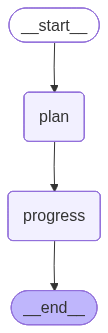

In [7]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))

In [10]:
initial_state: GoalState = {
    "goal": "I want to be LLM Architect",
    "milestones": [],
    "completed": [],
    "next_step": ""
}

final_state = app.invoke(initial_state)

In [11]:
print("Goal:", final_state["goal"])

print("\nMilestones:")
for m in final_state["milestones"]:
    print("-", m)

print("\nNext step:")
print(final_state["next_step"])

Goal: I want to be LLM Architect

Milestones:
- 1. Research and understand the fundamentals of machine learning and natural language processing (NLP).
- 2. Complete an introductory course on machine learning and NLP.
- 3. Gain proficiency in programming languages commonly used in LLM development (e.g., Python).
- 4. Learn about deep learning frameworks (e.g., TensorFlow, PyTorch).
- 5. Study existing LLM architectures (e.g., GPT, BERT) and their underlying principles.
- 6. Work on small-scale NLP projects to apply learned concepts and build a portfolio.
- 7. Pursue advanced courses or certifications in deep learning and NLP.
- 8. Collaborate on open-source LLM projects to gain practical experience.
- 9. Attend workshops, conferences, or webinars focused on LLMs and AI research.
- 10. Network with professionals in the field to gain insights and mentorship.
- 11. Develop a comprehensive understanding of model training, fine-tuning, and evaluation.
- 12. Create and publish a research pape